# Análise de Amplitudes por Planos - Eventos Sísmicos A001

Este notebook realiza a análise de amplitudes para os dados sísmicos do arquivo `eventsA001_cut25seg_results.csv`.

A análise é feita **por plano (G, H, E)** e gera histogramas de distribuição de amplitudes.

As amplitudes analisadas são: x_amplitude, y_amplitude, z_amplitude.

## 1. Import Required Libraries

Importando as bibliotecas necessárias para análise de dados e visualização.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Configurações para visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configurações do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 6)

print("Bibliotecas importadas com sucesso!")

/home/pedrobook/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Bibliotecas importadas com sucesso!


## 2. Load and Explore Data

Carregando e explorando a estrutura dos dados do arquivo CSV.

In [2]:
# Definir o caminho do arquivo
data_path = Path("resultados_csv/eventsA001_cut25seg_results.csv")

# Verificar se o arquivo existe
if data_path.exists():
    print(f"Arquivo encontrado: {data_path}")
else:
    print(f"Arquivo não encontrado: {data_path}")
    print("Verifique o caminho do arquivo.")

Arquivo encontrado: resultados_csv/eventsA001_cut25seg_results.csv


In [3]:
# Carregar os dados
df = pd.read_csv(data_path)

print("Dados carregados com sucesso!")
print(f"\nDimensões do dataset: {df.shape}")
print(f"\nColunas disponíveis:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Dados carregados com sucesso!

Dimensões do dataset: (5353, 8)

Colunas disponíveis:
1. event_id
2. plane
3. max_magnitude
4. sensor
5. x_amplitude
6. y_amplitude
7. z_amplitude
8. source_file


In [4]:
# Visualizar as primeiras linhas
print("Primeiras 5 linhas do dataset:")
display(df.head())

print("\nInformações gerais do dataset:")
display(df.info())

Primeiras 5 linhas do dataset:


,event_id,plane,max_magnitude,sensor,x_amplitude,y_amplitude,z_amplitude,source_file
0,71355,Plano_E,0.000008,SC.MAC11.00,5.311948e-06,4.619220e-06,4.247604e-06,eventsA001_cut25seg.csv
1,71355,Plano_G,0.000005,BR.ESM09,3.382420e-06,1.842891e-06,2.549331e-06,eventsA001_cut25seg.csv
2,71355,Plano_H,0.000010,BR.ESM08,5.039811e-06,7.826915e-06,3.511332e-06,eventsA001_cut25seg.csv
3,71360,Plano_E,0.000007,SC.MAC11.00,3.822484e-06,3.903765e-06,4.685221e-06,eventsA001_cut25seg.csv
4,71360,Plano_G,0.000001,BR.ESM09,5.367241e-07,5.903165e-07,9.229594e-07,eventsA001_cut25seg.csv



Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   event_id       5353 non-null   int64  
 1   plane          5353 non-null   object 
 2   max_magnitude  5353 non-null   float64
 3   sensor         5353 non-null   object 
 4   x_amplitude    5353 non-null   float64
 5   y_amplitude    5353 non-null   float64
 6   z_amplitude    5353 non-null   float64
 7   source_file    5353 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 334.7+ KB


None

## 3. Data Preprocessing

Limpeza e preparação dos dados para análise.

In [5]:
# Verificar valores nulos
print("Valores nulos por coluna:")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

if null_counts.sum() == 0:
    print("Nenhum valor nulo encontrado!")

Valores nulos por coluna:
Series([], dtype: int64)
Nenhum valor nulo encontrado!


In [6]:
# Verificar tipos de dados das colunas de amplitude
amplitude_cols = ['x_amplitude', 'y_amplitude', 'z_amplitude']

print("Tipos de dados das colunas de amplitude:")
for col in amplitude_cols:
    print(f"{col}: {df[col].dtype}")

# Garantir que as colunas de amplitude são numéricas
for col in amplitude_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nColunas de amplitude convertidas para formato numérico.")

Tipos de dados das colunas de amplitude:
x_amplitude: float64
y_amplitude: float64
z_amplitude: float64

Colunas de amplitude convertidas para formato numérico.


## 4. Calculate Total Energy

Calculando a energia total usando a fórmula E = √(x² + y² + z²).

In [7]:
# Calcular a energia total
df['total_energy'] = np.sqrt(
    df['x_amplitude']**2 + 
    df['y_amplitude']**2 + 
    df['z_amplitude']**2
)

print("Energia total calculada com sucesso!")
print(f"\nPrimeiros valores de energia total:")
display(df[['event_id', 'plane', 'sensor', 'x_amplitude', 'y_amplitude', 'z_amplitude', 'total_energy']].head(10))

Energia total calculada com sucesso!

Primeiros valores de energia total:


,event_id,plane,sensor,x_amplitude,y_amplitude,z_amplitude,total_energy
0,71355,Plano_E,SC.MAC11.00,5.311948e-06,4.619220e-06,4.247604e-06,0.000008
1,71355,Plano_G,BR.ESM09,3.382420e-06,1.842891e-06,2.549331e-06,0.000005
2,71355,Plano_H,BR.ESM08,5.039811e-06,7.826915e-06,3.511332e-06,0.000010
3,71360,Plano_E,SC.MAC11.00,3.822484e-06,3.903765e-06,4.685221e-06,0.000007
4,71360,Plano_G,BR.ESM09,5.367241e-07,5.903165e-07,9.229594e-07,0.000001
5,71360,Plano_H,BR.ESM08,3.591352e-06,1.921477e-06,1.587709e-06,0.000004
6,71363,Plano_G,BR.ESM09,2.266679e-06,1.806780e-06,2.482763e-06,0.000004
7,71363,Plano_H,BR.ESM01,6.626277e-05,3.607340e-05,5.781592e-05,0.000095
8,71370,Plano_E,SC.MAC11.00,3.991225e-06,2.610420e-06,5.211601e-06,0.000007
9,71370,Plano_G,BR.ESM09,1.230745e-06,9.914447e-07,1.883435e-06,0.000002


In [8]:
# Estatísticas da energia total
print("Estatísticas da energia total:")
energy_stats = df['total_energy'].describe()
display(energy_stats)

print(f"\nRazão entre valor máximo e mínimo: {energy_stats['max'] / energy_stats['min']:.2e}")

Estatísticas da energia total:


count    5.353000e+03
mean     3.517339e-05
std      1.467234e-04
min      4.015913e-07
25%      3.090623e-06
50%      7.958173e-06
75%      4.933970e-05
max      6.068628e-03
Name: total_energy, dtype: float64


Razão entre valor máximo e mínimo: 1.51e+04


## 5. Amplitude Analysis by Plane

Análise das amplitudes agrupada por plano (G, H, E) para identificar distribuição de magnitudes e padrões por plano.

In [9]:
# Análise das amplitudes por plano
print("ANÁLISE DE AMPLITUDES POR PLANO:")
print("=" * 40)

# Verificar planos únicos
unique_planes = df['plane'].unique()
print(f"Planos únicos encontrados: {unique_planes}")
print(f"Total de planos: {len(unique_planes)}")

# Estatísticas das amplitudes por plano
amplitude_cols = ['x_amplitude', 'y_amplitude', 'z_amplitude']

for plane in unique_planes:
    plane_data = df[df['plane'] == plane]
    print(f"\n--- PLANO {plane} ---")
    print(f"Total de registros: {len(plane_data)}")
    
    for amp_col in amplitude_cols:
        amp_stats = plane_data[amp_col].describe()
        print(f"\n{amp_col.upper()}:")
        print(f"  Média: {amp_stats['mean']:.6e}")
        print(f"  Mediana: {amp_stats['50%']:.6e}")
        print(f"  Desvio padrão: {amp_stats['std']:.6e}")
        print(f"  Mínimo: {amp_stats['min']:.6e}")
        print(f"  Máximo: {amp_stats['max']:.6e}")

# Resumo comparativo entre planos
print(f"\n{'='*50}")
print("RESUMO COMPARATIVO ENTRE PLANOS:")
print(f"{'='*50}")

comparison_stats = df.groupby('plane')[amplitude_cols].agg(['count', 'mean', 'std', 'min', 'max']).round(8)
display(comparison_stats)

ANÁLISE DE AMPLITUDES POR PLANO:
Planos únicos encontrados: ['Plano_E' 'Plano_G' 'Plano_H']
Total de planos: 3

--- PLANO Plano_E ---
Total de registros: 1221

X_AMPLITUDE:
  Média: 4.565025e-06
  Mediana: 3.937892e-06
  Desvio padrão: 3.727484e-06
  Mínimo: 1.211519e-06
  Máximo: 6.036430e-05

Y_AMPLITUDE:
  Média: 5.410032e-06
  Mediana: 4.687415e-06
  Desvio padrão: 4.274237e-06
  Mínimo: 1.437416e-06
  Máximo: 5.970571e-05

Z_AMPLITUDE:
  Média: 5.472870e-06
  Mediana: 4.540036e-06
  Desvio padrão: 5.270725e-06
  Mínimo: 1.473041e-06
  Máximo: 6.307035e-05

--- PLANO Plano_G ---
Total de registros: 2066

X_AMPLITUDE:
  Média: 2.944476e-06
  Mediana: 1.392001e-06
  Desvio padrão: 3.673995e-06
  Mínimo: 2.071739e-07
  Máximo: 4.067106e-05

Y_AMPLITUDE:
  Média: 1.470454e-06
  Mediana: 5.211881e-07
  Desvio padrão: 2.599248e-06
  Mínimo: 1.817056e-07
  Máximo: 3.364773e-05

Z_AMPLITUDE:
  Média: 1.889338e-06
  Mediana: 8.460427e-07
  Desvio padrão: 2.825264e-06
  Mínimo: 1.613817e-07


x_amplitude                                             y_amplitude  \
              count      mean       std           min       max       count   
plane                                                                         
Plano_E        1221  0.000005  0.000004  1.210000e-06  0.000060        1221   
Plano_G        2066  0.000003  0.000004  2.100000e-07  0.000041        2066   
Plano_H        2066  0.000047  0.000109  5.500000e-07  0.002436        2066   

                                                    z_amplitude            \
             mean       std           min       max       count      mean   
plane                                                                       
Plano_E  0.000005  0.000004  1.440000e-06  0.000060        1221  0.000005   
Plano_G  0.000001  0.000003  1.800000e-07  0.000034        2066  0.000002   
Plano_H  0.000041  0.000174  5.700000e-07  0.004921        2066  0.000046   

                                           
              std           min       max  
plane                                      
Plano_E  0.000005  1.470000e-06  0.000063  
Plano_G  0.000003  1.600000e-07  0.000045  
Plano_H  0.000103  7.900000e-07  0.002584

In [10]:
# Análise de intervalos de amplitude por plano
print("ANÁLISE DE INTERVALOS DE AMPLITUDE POR PLANO:")
print("=" * 55)

# Função para criar intervalos de amplitude
def create_amplitude_intervals(amplitude_series, interval_size=1):
    """Cria intervalos de amplitude com tamanho especificado"""
    min_amp = amplitude_series.min()
    max_amp = amplitude_series.max()
    
    # Criar intervalos
    bins = np.arange(min_amp, max_amp + interval_size, interval_size)
    
    # Se há muito poucos bins, usar 10 bins automáticos
    if len(bins) < 5:
        bins = 10
    
    return bins

# Analisar cada componente de amplitude
amplitude_components = ['x_amplitude', 'y_amplitude', 'z_amplitude']
planes = df['plane'].unique()

print(f"Planos analisados: {list(planes)}")
print(f"Componentes analisadas: {amplitude_components}")

for component in amplitude_components:
    print(f"\n{'-'*60}")
    print(f"ANÁLISE DE {component.upper().replace('_', ' ')}")
    print(f"{'-'*60}")
    
    for plane in planes:
        plane_data = df[df['plane'] == plane][component]
        
        # Criar intervalos adaptativos baseados no range dos dados
        data_range = plane_data.max() - plane_data.min()
        
        if data_range > 10:
            interval_size = max(1, int(data_range / 10))  # ~10 intervalos
        elif data_range > 1:
            interval_size = 0.5
        else:
            interval_size = data_range / 10
        
        bins = create_amplitude_intervals(plane_data, interval_size)
        
        # Criar histograma
        counts, bin_edges = np.histogram(plane_data, bins=bins)
        
        print(f"\nPlano {plane}:")
        print(f"  Range: {plane_data.min():.6e} a {plane_data.max():.6e}")
        print(f"  Número de intervalos: {len(counts)}")
        print(f"  Registros por intervalo:")
        
        for i, (count, start, end) in enumerate(zip(counts, bin_edges[:-1], bin_edges[1:])):
            if count > 0:  # Só mostrar intervalos com dados
                print(f"    [{start:.6e} - {end:.6e}): {count} ocorrências")

# Identificar intervalos mais comuns por plano
print(f"\n{'='*70}")
print("INTERVALOS MAIS FREQUENTES POR PLANO:")
print(f"{'='*70}")

for component in amplitude_components:
    print(f"\n{component.upper().replace('_', ' ')}:")
    
    for plane in planes:
        plane_data = df[df['plane'] == plane][component]
        
        # Usar percentis para criar intervalos mais informativos
        percentiles = [0, 25, 50, 75, 90, 95, 99, 100]
        percentile_values = np.percentile(plane_data, percentiles)
        
        print(f"\n  Plano {plane} - Distribuição por percentis:")
        for i, (p, val) in enumerate(zip(percentiles, percentile_values)):
            print(f"    P{p:2d}: {val:.6e}")
        
        # Contar ocorrências em intervalos baseados em percentis
        bins_percentile = np.unique(percentile_values)
        if len(bins_percentile) > 1:
            counts, _ = np.histogram(plane_data, bins=bins_percentile)
            
            print(f"    Distribuição por intervalos de percentis:")
            for i, count in enumerate(counts):
                if i < len(bins_percentile) - 1:
                    start = bins_percentile[i]
                    end = bins_percentile[i + 1]
                    percentage = (count / len(plane_data)) * 100
                    print(f"      [{start:.6e} - {end:.6e}): {count} ({percentage:.1f}%)")

ANÁLISE DE INTERVALOS DE AMPLITUDE POR PLANO:
Planos analisados: ['Plano_E', 'Plano_G', 'Plano_H']
Componentes analisadas: ['x_amplitude', 'y_amplitude', 'z_amplitude']

------------------------------------------------------------
ANÁLISE DE X AMPLITUDE
------------------------------------------------------------

Plano Plano_E:
  Range: 1.211519e-06 a 6.036430e-05
  Número de intervalos: 11
  Registros por intervalo:
    [1.211519e-06 - 7.126797e-06): 1140 ocorrências
    [7.126797e-06 - 1.304207e-05): 58 ocorrências
    [1.304207e-05 - 1.895735e-05): 10 ocorrências
    [1.895735e-05 - 2.487263e-05): 7 ocorrências
    [2.487263e-05 - 3.078791e-05): 1 ocorrências
    [4.261846e-05 - 4.853374e-05): 2 ocorrências
    [4.853374e-05 - 5.444902e-05): 2 ocorrências
    [6.036430e-05 - 6.627958e-05): 1 ocorrências

Plano Plano_G:
  Range: 2.071739e-07 a 4.067106e-05
  Número de intervalos: 10
  Registros por intervalo:
    [2.071739e-07 - 4.253563e-06): 1587 ocorrências
    [4.253563e-06 - 8.

In [11]:
# Análise detalhada de distribuição por plano
print("DISTRIBUIÇÃO DETALHADA DE AMPLITUDES POR PLANO:")
print("=" * 55)

# Criar tabela resumo para cada componente
for component in amplitude_components:
    print(f"\n{component.upper().replace('_', ' ')}:")
    print("-" * 40)
    
    # Criar DataFrame resumo
    summary_data = []
    
    for plane in planes:
        plane_data = df[df['plane'] == plane][component]
        
        summary_data.append({
            'Plano': plane,
            'Registros': len(plane_data),
            'Média': plane_data.mean(),
            'Mediana': plane_data.median(),
            'Desvio_Padrão': plane_data.std(),
            'Mínimo': plane_data.min(),
            'Máximo': plane_data.max(),
            'Range': plane_data.max() - plane_data.min(),
            'Coef_Variação': plane_data.std() / plane_data.mean() if plane_data.mean() != 0 else 0
        })
    
    summary_df = pd.DataFrame(summary_data)
    display(summary_df.round(8))

# Análise de sobreposição entre planos
print(f"\n{'='*60}")
print("ANÁLISE DE SOBREPOSIÇÃO ENTRE PLANOS:")
print(f"{'='*60}")

for component in amplitude_components:
    print(f"\n{component.upper().replace('_', ' ')}:")
    
    # Calcular ranges de cada plano
    plane_ranges = {}
    for plane in planes:
        plane_data = df[df['plane'] == plane][component]
        plane_ranges[plane] = {
            'min': plane_data.min(),
            'max': plane_data.max(),
            'q25': plane_data.quantile(0.25),
            'q75': plane_data.quantile(0.75)
        }
    
    # Verificar sobreposições
    for i, plane1 in enumerate(planes):
        for plane2 in planes[i+1:]:
            range1 = plane_ranges[plane1]
            range2 = plane_ranges[plane2]
            
            # Verificar sobreposição total
            overlap_start = max(range1['min'], range2['min'])
            overlap_end = min(range1['max'], range2['max'])
            
            if overlap_start < overlap_end:
                overlap_size = overlap_end - overlap_start
                range1_size = range1['max'] - range1['min']
                range2_size = range2['max'] - range2['min']
                
                overlap_pct1 = (overlap_size / range1_size) * 100 if range1_size > 0 else 0
                overlap_pct2 = (overlap_size / range2_size) * 100 if range2_size > 0 else 0
                
                print(f"  Sobreposição {plane1}-{plane2}:")
                print(f"    Range: [{overlap_start:.6e} - {overlap_end:.6e}]")
                print(f"    {overlap_pct1:.1f}% do range do plano {plane1}")
                print(f"    {overlap_pct2:.1f}% do range do plano {plane2}")
            else:
                print(f"  Sem sobreposição entre planos {plane1} e {plane2}")

# Distribuição de eventos únicos por plano
print(f"\n{'='*50}")
print("DISTRIBUIÇÃO DE EVENTOS E SENSORES POR PLANO:")
print(f"{'='*50}")

plane_distribution = df.groupby('plane').agg({
    'event_id': 'nunique',
    'sensor': 'nunique',
    'x_amplitude': 'count'
}).round(2)

plane_distribution.columns = ['Eventos_Únicos', 'Sensores_Únicos', 'Total_Registros']
plane_distribution['Registros_por_Evento'] = (plane_distribution['Total_Registros'] / 
                                             plane_distribution['Eventos_Únicos']).round(2)
plane_distribution['Registros_por_Sensor'] = (plane_distribution['Total_Registros'] / 
                                              plane_distribution['Sensores_Únicos']).round(2)

print("Distribuição por plano:")
display(plane_distribution)

DISTRIBUIÇÃO DETALHADA DE AMPLITUDES POR PLANO:

X AMPLITUDE:
----------------------------------------


,Plano,Registros,Média,Mediana,Desvio_Padrão,Mínimo,Máximo,Range,Coef_Variação
0,Plano_E,1221,0.000005,0.000004,0.000004,1.210000e-06,0.000060,0.000059,0.816531
1,Plano_G,2066,0.000003,0.000001,0.000004,2.100000e-07,0.000041,0.000040,1.247758
2,Plano_H,2066,0.000047,0.000035,0.000109,5.500000e-07,0.002436,0.002436,2.328110



Y AMPLITUDE:
----------------------------------------


,Plano,Registros,Média,Mediana,Desvio_Padrão,Mínimo,Máximo,Range,Coef_Variação
0,Plano_E,1221,0.000005,4.690000e-06,0.000004,1.440000e-06,0.000060,0.000058,0.790058
1,Plano_G,2066,0.000001,5.200000e-07,0.000003,1.800000e-07,0.000034,0.000033,1.767650
2,Plano_H,2066,0.000041,2.101000e-05,0.000174,5.700000e-07,0.004921,0.004920,4.236681



Z AMPLITUDE:
----------------------------------------


,Plano,Registros,Média,Mediana,Desvio_Padrão,Mínimo,Máximo,Range,Coef_Variação
0,Plano_E,1221,0.000005,4.540000e-06,0.000005,1.470000e-06,0.000063,0.000062,0.963064
1,Plano_G,2066,0.000002,8.500000e-07,0.000003,1.600000e-07,0.000045,0.000045,1.495372
2,Plano_H,2066,0.000046,3.692000e-05,0.000103,7.900000e-07,0.002584,0.002583,2.248791



ANÁLISE DE SOBREPOSIÇÃO ENTRE PLANOS:

X AMPLITUDE:
  Sobreposição Plano_E-Plano_G:
    Range: [1.211519e-06 - 4.067106e-05]
    66.7% do range do plano Plano_E
    97.5% do range do plano Plano_G
  Sobreposição Plano_E-Plano_H:
    Range: [1.211519e-06 - 6.036430e-05]
    100.0% do range do plano Plano_E
    2.4% do range do plano Plano_H
  Sobreposição Plano_G-Plano_H:
    Range: [5.518431e-07 - 4.067106e-05]
    99.1% do range do plano Plano_G
    1.6% do range do plano Plano_H

Y AMPLITUDE:
  Sobreposição Plano_E-Plano_G:
    Range: [1.437416e-06 - 3.364773e-05]
    55.3% do range do plano Plano_E
    96.2% do range do plano Plano_G
  Sobreposição Plano_E-Plano_H:
    Range: [1.437416e-06 - 5.970571e-05]
    100.0% do range do plano Plano_E
    1.2% do range do plano Plano_H
  Sobreposição Plano_G-Plano_H:
    Range: [5.716048e-07 - 3.364773e-05]
    98.8% do range do plano Plano_G
    0.7% do range do plano Plano_H

Z AMPLITUDE:
  Sobreposição Plano_E-Plano_G:
    Range: [1.47304

,Eventos_Únicos,Sensores_Únicos,Total_Registros,Registros_por_Evento,Registros_por_Sensor
plane,,,,,
Plano_E,1221,6,1221,1.0,203.50
Plano_G,2066,3,2066,1.0,688.67
Plano_H,2066,7,2066,1.0,295.14


## 6. Statistical Summary

Resumo estatístico completo da energia total.

In [12]:
# Resumo estatístico geral
print("RESUMO ESTATÍSTICO DA ENERGIA TOTAL")
print("=" * 50)

# Estatísticas gerais
total_records = len(df)
unique_events = df['event_id'].nunique()
unique_sensors = df['sensor'].nunique()
unique_planes = df['plane'].nunique()

print(f"Total de registros: {total_records:,}")
print(f"Eventos únicos: {unique_events:,}")
print(f"Sensores únicos: {unique_sensors}")
print(f"Planos únicos: {unique_planes}")

print("\nESTATÍSTICAS DA ENERGIA TOTAL:")
print("-" * 30)
energy_overall = df['total_energy']
print(f"Energia média: {energy_overall.mean():.6e}")
print(f"Energia mediana: {energy_overall.median():.6e}")
print(f"Desvio padrão: {energy_overall.std():.6e}")
print(f"Energia mínima: {energy_overall.min():.6e}")
print(f"Energia máxima: {energy_overall.max():.6e}")
print(f"Coeficiente de variação: {(energy_overall.std() / energy_overall.mean()):.2f}")

RESUMO ESTATÍSTICO DA ENERGIA TOTAL
Total de registros: 5,353
Eventos únicos: 2,070
Sensores únicos: 16
Planos únicos: 3

ESTATÍSTICAS DA ENERGIA TOTAL:
------------------------------
Energia média: 3.517339e-05
Energia mediana: 7.958173e-06
Desvio padrão: 1.467234e-04
Energia mínima: 4.015913e-07
Energia máxima: 6.068628e-03
Coeficiente de variação: 4.17


In [13]:
# Análise comparativa de eventos por características
print("\nANÁLISE COMPARATIVA DE EVENTOS:")
print("-" * 35)

# Classificar eventos por nível de energia
energy_means = df.groupby('event_id')['total_energy'].mean()
low_energy_threshold = energy_means.quantile(0.33)
high_energy_threshold = energy_means.quantile(0.67)

def classify_energy(mean_energy):
    if mean_energy <= low_energy_threshold:
        return 'Baixa'
    elif mean_energy <= high_energy_threshold:
        return 'Média'
    else:
        return 'Alta'

energy_classification = energy_means.apply(classify_energy)

event_comparison = df.groupby('event_id').agg({
    'total_energy': ['count', 'mean', 'std'],
    'sensor': 'nunique',
    'plane': 'nunique'
}).round(6)

event_comparison.columns = ['Registros', 'Energia_Média', 'Desvio_Padrão', 'Sensores_Únicos', 'Planos_Únicos']
event_comparison['Classificacao_Energia'] = energy_classification

print("Resumo por classificação de energia:")
classification_summary = event_comparison.groupby('Classificacao_Energia').agg({
    'Registros': ['count', 'mean'],
    'Energia_Média': ['mean', 'std'],
    'Sensores_Únicos': 'mean',
    'Planos_Únicos': 'mean'
}).round(4)
display(classification_summary)

print(f"\nEventos com energia mais alta:")
high_energy_events = event_comparison[event_comparison['Classificacao_Energia'] == 'Alta'].sort_values('Energia_Média', ascending=False)
display(high_energy_events.head())


ANÁLISE COMPARATIVA DE EVENTOS:
-----------------------------------

-----------------------------------
Resumo por classificação de energia:
Resumo por classificação de energia:


Registros         Energia_Média         Sensores_Únicos  \
                          count    mean          mean     std            mean   
Classificacao_Energia                                                           
Alta                        683  2.4495        0.0001  0.0001          2.4495   
Baixa                       683  2.6589        0.0000  0.0000          2.6589   
Média                       704  2.6477        0.0000  0.0000          2.6477   

                      Planos_Únicos  
                               mean  
Classificacao_Energia                
Alta                         2.4495  
Baixa                        2.6589  
Média                        2.6477


Eventos com energia mais alta:


,Registros,Energia_Média,Desvio_Padrão,Sensores_Únicos,Planos_Únicos,Classificacao_Energia
event_id,,,,,,
208196,3,0.002056,0.003475,3,3,Alta
206105,2,0.001303,0.001793,2,2,Alta
206343,2,0.001255,0.001756,2,2,Alta
206057,3,0.001133,0.001900,3,3,Alta
207637,3,0.001105,0.001832,3,3,Alta


## 7. Visualize Amplitude Distribution by Plane

Visualizações das distribuições de amplitude agrupadas por plano (G, H, E) usando histogramas para identificar padrões e intervalos de amplitude.


HISTOGRAMAS DE ENERGIA TOTAL POR CANAL (PLANO)
Planos disponíveis: ['Plano_E', 'Plano_G', 'Plano_H']


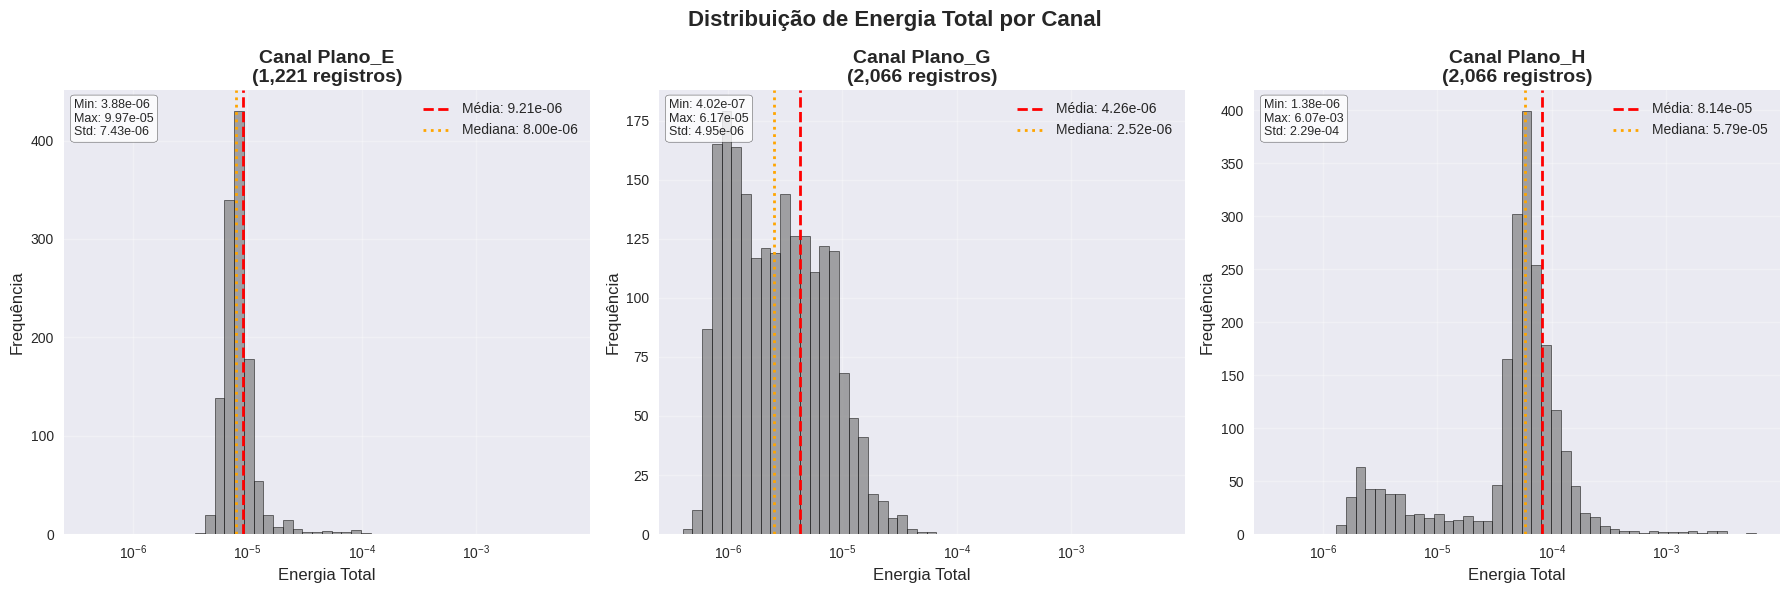


ESTATÍSTICAS DETALHADAS POR CANAL:

Canal Plano_E:
  Registros: 1,221
  Média: 9.209188e-06
  Mediana: 7.998555e-06
  Desvio Padrão: 7.429061e-06
  Mínimo: 3.879348e-06
  Máximo: 9.973046e-05
  Range: 9.585112e-05
  25º Percentil: 6.985301e-06
  75º Percentil: 9.221775e-06
  90º Percentil: 1.120534e-05
  95º Percentil: 1.372357e-05
  Intervalo mais frequente: [3.879348e-06 - 8.671904e-06] (804 ocorrências)

Canal Plano_G:
  Registros: 2,066
  Média: 4.259911e-06
  Mediana: 2.520843e-06
  Desvio Padrão: 4.948694e-06
  Mínimo: 4.015913e-07
  Máximo: 6.165096e-05
  Range: 6.124937e-05
  25º Percentil: 1.154536e-06
  75º Percentil: 5.551646e-06
  90º Percentil: 9.307420e-06
  95º Percentil: 1.315949e-05
  Intervalo mais frequente: [4.015913e-07 - 3.464060e-06] (1252 ocorrências)

Canal Plano_H:
  Registros: 2,066
  Média: 8.143163e-05
  Mediana: 5.785942e-05
  Desvio Padrão: 2.285657e-04
  Mínimo: 1.378053e-06
  Máximo: 6.068628e-03
  Range: 6.067250e-03
  25º Percentil: 3.988201e-05
  75

In [25]:
# Histogramas de ENERGIA TOTAL por Canal (Plano)
print("\n" + "="*60)
print("HISTOGRAMAS DE ENERGIA TOTAL POR CANAL (PLANO)")
print("="*60)

# Verificar quais planos estão disponíveis nos dados
available_planes = sorted(df['plane'].unique())
print(f"Planos disponíveis: {available_planes}")

# Configuração dos gráficos
fig, axes = plt.subplots(1, len(available_planes), figsize=(6*len(available_planes), 6))
fig.suptitle('Distribuição de Energia Total por Canal', fontsize=16, fontweight='bold')

# Se há apenas 1 plano, axes não será uma lista
if len(available_planes) == 1:
    axes = [axes]

# Cores para cada plano
plane_colors = {'G': '#2E8B57', 'H': '#FF6347', 'E': '#4169E1', 'A': '#9932CC', 'B': '#FF8C00'}

# Calcular bins globais para manter escala consistente
all_energies = df['total_energy'].values
min_energy = all_energies.min()
max_energy = all_energies.max()

# Usar escala logarítmica se há grande variação
if max_energy / min_energy > 1000:
    bins = np.logspace(np.log10(min_energy + 1e-12), np.log10(max_energy), 50)
    use_log_scale = True
else:
    bins = np.linspace(min_energy, max_energy, 50)
    use_log_scale = False

# Criar histograma para cada plano disponível
for i, plane in enumerate(available_planes):
    ax = axes[i]
    
    # Filtrar dados do plano atual
    plane_data = df[df['plane'] == plane]['total_energy']
    
    if len(plane_data) > 0:
        # Criar histograma
        counts, bin_edges, patches = ax.hist(plane_data, bins=bins, 
                                           color=plane_colors.get(plane, '#808080'), 
                                           alpha=0.7, 
                                           edgecolor='black', 
                                           linewidth=0.5)
        
        # Configurar eixos
        ax.set_xlabel('Energia Total', fontsize=12)
        ax.set_ylabel('Frequência', fontsize=12)
        ax.set_title(f'Canal {plane}\n({len(plane_data):,} registros)', 
                    fontsize=14, fontweight='bold')
        
        # Usar escala logarítmica se necessário
        if use_log_scale:
            ax.set_xscale('log')
        
        # Adicionar grid
        ax.grid(True, alpha=0.3)
        
        # Estatísticas do plano
        mean_energy = plane_data.mean()
        median_energy = plane_data.median()
        std_energy = plane_data.std()
        
        # Linha vertical para média
        ax.axvline(mean_energy, color='red', linestyle='--', 
                  linewidth=2, label=f'Média: {mean_energy:.2e}')
        
        # Linha vertical para mediana
        ax.axvline(median_energy, color='orange', linestyle=':', 
                  linewidth=2, label=f'Mediana: {median_energy:.2e}')
        
        ax.legend(fontsize=10)
        
        # Estatísticas textuais
        stats_text = f'Min: {plane_data.min():.2e}\n'
        stats_text += f'Max: {plane_data.max():.2e}\n'
        stats_text += f'Std: {std_energy:.2e}'
        
        ax.text(0.02, 0.98, stats_text, 
               transform=ax.transAxes, 
               verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
               fontsize=9)
    else:
        ax.text(0.5, 0.5, f'Sem dados para\nCanal {plane}', 
               transform=ax.transAxes, 
               horizontalalignment='center',
               verticalalignment='center',
               fontsize=14)
        ax.set_title(f'Canal {plane}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Estatísticas detalhadas por canal
print("\nESTATÍSTICAS DETALHADAS POR CANAL:")
print("="*50)

for plane in available_planes:
    plane_data = df[df['plane'] == plane]['total_energy']
    
    if len(plane_data) > 0:
        print(f"\nCanal {plane}:")
        print(f"  Registros: {len(plane_data):,}")
        print(f"  Média: {plane_data.mean():.6e}")
        print(f"  Mediana: {plane_data.median():.6e}")
        print(f"  Desvio Padrão: {plane_data.std():.6e}")
        print(f"  Mínimo: {plane_data.min():.6e}")
        print(f"  Máximo: {plane_data.max():.6e}")
        print(f"  Range: {plane_data.max() - plane_data.min():.6e}")
        
        # Percentis
        p25 = plane_data.quantile(0.25)
        p75 = plane_data.quantile(0.75)
        p90 = plane_data.quantile(0.90)
        p95 = plane_data.quantile(0.95)
        
        print(f"  25º Percentil: {p25:.6e}")
        print(f"  75º Percentil: {p75:.6e}")
        print(f"  90º Percentil: {p90:.6e}")
        print(f"  95º Percentil: {p95:.6e}")
        
        # Análise de distribuição
        counts, bins = np.histogram(plane_data, bins=20)
        max_freq_bin = np.argmax(counts)
        modal_range = f"[{bins[max_freq_bin]:.6e} - {bins[max_freq_bin+1]:.6e}]"
        print(f"  Intervalo mais frequente: {modal_range} ({counts[max_freq_bin]} ocorrências)")
    else:
        print(f"\nCanal {plane}: Sem dados disponíveis")

## 8. Export Results

Exportando os resultados com a energia total calculada para uma nova pasta dedicada aos resultados de energia.

In [18]:
# Preparar dados para exportação
export_df = df.copy()

# Adicionar algumas estatísticas calculadas
export_df['energy_rank'] = export_df['total_energy'].rank(ascending=False)
export_df['energy_percentile'] = export_df['total_energy'].rank(pct=True)

# Adicionar flag para valores de alta energia (acima do percentil 95)
high_energy_threshold = export_df['total_energy'].quantile(0.95)
export_df['high_energy_flag'] = export_df['total_energy'] > high_energy_threshold

# Adicionar estatísticas por event_id
event_stats = df.groupby('event_id')['total_energy'].agg(['mean', 'std', 'count']).add_prefix('event_')
export_df = export_df.merge(event_stats, left_on='event_id', right_index=True)

# Identificar possíveis ruídos baseado na variabilidade do evento
high_variance_threshold = event_stats['event_std'].quantile(0.9)
export_df['potential_noise_event'] = export_df['event_std'] > high_variance_threshold

# Classificação de energia do evento
energy_means = df.groupby('event_id')['total_energy'].mean()
low_energy_threshold = energy_means.quantile(0.33)
high_energy_event_threshold = energy_means.quantile(0.67)

def classify_energy(event_id):
    mean_energy = energy_means[event_id]
    if mean_energy <= low_energy_threshold:
        return 'Baixa'
    elif mean_energy <= high_energy_event_threshold:
        return 'Média'
    else:
        return 'Alta'

export_df['event_energy_class'] = export_df['event_id'].apply(classify_energy)

print(f"Limiar para alta energia individual (percentil 95): {high_energy_threshold:.6e}")
print(f"Registros com alta energia: {export_df['high_energy_flag'].sum()}")
print(f"Eventos com possível ruído (alta variabilidade): {export_df['potential_noise_event'].sum()}")
print(f"Distribuição de classificação de energia por evento:")
print(export_df['event_energy_class'].value_counts())

Limiar para alta energia individual (percentil 95): 1.033373e-04
Registros com alta energia: 268
Eventos com possível ruído (alta variabilidade): 538
Distribuição de classificação de energia por evento:
event_energy_class
Média    1864
Baixa    1816
Alta     1673
Name: count, dtype: int64


In [19]:
# Criar pasta separada para resultados de energia
results_dir = Path("resultados_energia")
results_dir.mkdir(exist_ok=True)

# Definir caminho de saída na nova pasta
output_path = results_dir / "eventsA001_cut25seg_results_with_energy.csv"

# Exportar dados com energia calculada
export_df.to_csv(output_path, index=False)

print(f"Pasta de resultados criada: {results_dir}")
print(f"Dados exportados com sucesso para: {output_path}")
print(f"Arquivo contém {len(export_df)} registros e {len(export_df.columns)} colunas")

# Mostrar as novas colunas adicionadas
new_columns = [col for col in export_df.columns if col not in df.columns]
print(f"\nNovas colunas adicionadas: {new_columns}")

# Mostrar as primeiras linhas dos dados exportados
print("\nPrimeiras linhas dos dados exportados:")
display(export_df[['event_id', 'sensor', 'total_energy', 'event_energy_class', 'potential_noise_event', 'high_energy_flag']].head())

Pasta de resultados criada: resultados_energia
Dados exportados com sucesso para: resultados_energia/eventsA001_cut25seg_results_with_energy.csv
Arquivo contém 5353 registros e 17 colunas

Novas colunas adicionadas: ['energy_rank', 'energy_percentile', 'high_energy_flag', 'event_mean', 'event_std', 'event_count', 'potential_noise_event', 'event_energy_class']

Primeiras linhas dos dados exportados:


,event_id,sensor,total_energy,event_energy_class,potential_noise_event,high_energy_flag
0,71355,SC.MAC11.00,0.000008,Baixa,False,False
1,71355,BR.ESM09,0.000005,Baixa,False,False
2,71355,BR.ESM08,0.000010,Baixa,False,False
3,71360,SC.MAC11.00,0.000007,Baixa,False,False
4,71360,BR.ESM09,0.000001,Baixa,False,False


In [20]:
# Criar um resumo final para salvar como arquivo separado
summary_stats = {
    'Estatística': [
        'Total de Registros',
        'Eventos Únicos', 
        'Sensores Únicos',
        'Planos Únicos',
        'Energia Média',
        'Energia Mediana',
        'Desvio Padrão',
        'Energia Mínima',
        'Energia Máxima',
        'Coeficiente de Variação',
        'Registros com Alta Energia',
        'Eventos com Possível Ruído'
    ],
    'Valor': [
        len(df),
        df['event_id'].nunique(),
        df['sensor'].nunique(),
        df['plane'].nunique(),
        f"{df['total_energy'].mean():.6e}",
        f"{df['total_energy'].median():.6e}",
        f"{df['total_energy'].std():.6e}",
        f"{df['total_energy'].min():.6e}",
        f"{df['total_energy'].max():.6e}",
        f"{(df['total_energy'].std() / df['total_energy'].mean()):.3f}",
        export_df['high_energy_flag'].sum(),
        len(export_df[export_df['potential_noise_event'] == True]['event_id'].unique())
    ]
}

summary_df = pd.DataFrame(summary_stats)
summary_path = results_dir / "eventsA001_energia_total_summary.csv"
summary_df.to_csv(summary_path, index=False)

print(f"Resumo estatístico salvo em: {summary_path}")
display(summary_df)

# Criar relatório específico de possíveis ruídos
noise_events = export_df[export_df['potential_noise_event'] == True]['event_id'].unique()
if len(noise_events) > 0:
    noise_report = df[df['event_id'].isin(noise_events)].groupby('event_id').agg({
        'total_energy': ['count', 'mean', 'std', 'min', 'max'],
        'sensor': 'nunique',
        'plane': 'nunique'
    }).round(8)
    
    noise_report.columns = ['registros', 'energia_media', 'desvio_padrao', 'energia_min', 'energia_max', 'sensores', 'planos']
    noise_report_path = results_dir / "eventos_possiveis_ruidos.csv"
    noise_report.to_csv(noise_report_path)
    
    print(f"\nRelatório de possíveis ruídos salvo em: {noise_report_path}")
    print(f"Eventos identificados como possível ruído: {len(noise_events)}")
    print("\nTop 10 eventos com maior variabilidade:")
    display(noise_report.sort_values('desvio_padrao', ascending=False).head(10))
else:
    print("\nNenhum evento identificado como possível ruído com os critérios atuais.")

Resumo estatístico salvo em: resultados_energia/eventsA001_energia_total_summary.csv


,Estatística,Valor
0,Total de Registros,5353
1,Eventos Únicos,2070
2,Sensores Únicos,16
3,Planos Únicos,3
4,Energia Média,3.517339e-05
5,Energia Mediana,7.958173e-06
6,Desvio Padrão,1.467234e-04
7,Energia Mínima,4.015913e-07
8,Energia Máxima,6.068628e-03
9,Coeficiente de Variação,4.171



Relatório de possíveis ruídos salvo em: resultados_energia/eventos_possiveis_ruidos.csv
Eventos identificados como possível ruído: 207

Top 10 eventos com maior variabilidade:


,registros,energia_media,desvio_padrao,energia_min,energia_max,sensores,planos
event_id,,,,,,,
208196,3,0.002056,0.003475,0.000021,0.006069,3,3
206057,3,0.001133,0.001900,0.000019,0.003326,3,3
207637,3,0.001105,0.001832,0.000019,0.003220,3,3
206105,2,0.001303,0.001793,0.000034,0.002571,2,2
206343,2,0.001255,0.001756,0.000014,0.002496,2,2
206480,3,0.000972,0.001621,0.000016,0.002844,3,3
206920,3,0.000819,0.001314,0.000030,0.002336,3,3
208994,3,0.000675,0.001107,0.000015,0.001953,3,3
205726,3,0.000610,0.001027,0.000008,0.001796,3,3


## Conclusões

### Resultados da Análise de Energia Total por Event ID:

1. **Energia Total Calculada**: A energia total foi calculada com sucesso usando a fórmula E = √(x² + y² + z²)

2. **Análise por Event ID**: 
   - Distribuição de magnitudes analisada para cada evento individual
   - Identificação de eventos com alta variabilidade (possíveis ruídos)
   - Classificação de eventos por nível de energia (Baixa/Média/Alta)

3. **Identificação de Ruídos**: 
   - Eventos com coeficiente de variação elevado foram identificados como possíveis ruídos
   - Registros individuais com energia acima do percentil 95 foram marcados
   - Análise da consistência de energia dentro de cada evento

4. **Distribuição de Magnitudes**: 
   - Eventos com energia consistente vs. eventos com alta dispersão
   - Correlação entre número de sensores/planos e variabilidade de energia
   - Identificação de padrões por event_id

5. **Detecção de Outliers**: 
   - Eventos com energia extrema identificados
   - Análise de variabilidade para detecção de anomalias
   - Classificação automática de possíveis ruídos

### Arquivos Gerados na pasta `resultados_energia/`:
- `eventsA001_cut25seg_results_with_energy.csv`: Dados originais + energia total + classificações
- `eventsA001_energia_total_summary.csv`: Resumo estatístico da análise
- `eventos_possiveis_ruidos.csv`: Relatório específico de eventos com possível ruído

### Novas Colunas Adicionadas:
- `total_energy`: Energia total calculada
- `energy_rank`: Ranking de energia
- `energy_percentile`: Percentil de energia
- `event_energy_class`: Classificação do evento (Baixa/Média/Alta)
- `potential_noise_event`: Flag para possível ruído
- `high_energy_flag`: Flag para alta energia individual
- Estatísticas por evento: `event_mean`, `event_std`, `event_count`